In [1]:
from datetime import datetime
import calendar
import pandas as pd

# Import and call the Riak client to connect to your Riak TS node or cluster
# See http://docs.basho.com/riak/ts/latest/developing/python/ for more information
# on how to use the Riak client for Python
from riak import RiakClient

# Note: If you wish Riak TS to return date fields as Python dates
# and not epoch you need to set the transport_options as shown below
client = RiakClient(transport_options={'ts_convert_timestamp': True})

table = "WaterMeterMonthlyRollUp"

# Funtion to convert Python date to Unix Epoch
def convert_to_epoch ( date_to_convert ):
    return calendar.timegm(datetime.timetuple( date_to_convert )) * 1000

# Function to convert TsObject to list of lists
def ts_obj_to_list_of_lists (ts_obj):
    list_to_return = []
    for row in ts_obj.rows:
        list = []
        for i in range(len(row)):
            list.append(row[i])
        list_to_return.append(list)
    return list_to_return

In [2]:
start_date = datetime(2016, 1, 1, 0, 00)
end_date = datetime(2017, 2, 1, 0, 00)

query = """\
    SELECT reading_date, total_gallons
    FROM WaterMeterMonthlyRollUp
    WHERE reading_date >= {} AND reading_date < {} AND
        customer_id = 'CUSTOMER-0001' AND meter_id = 'METER-0001'
""".format( convert_to_epoch( start_date ), convert_to_epoch( end_date ) )

data_set = client.ts_query(table, query)

# Convert TsObject to list of lists and create Pandas DataFrame
boring_list = ts_obj_to_list_of_lists( data_set )
df = pd.DataFrame( boring_list )

# Set the column names and the index to the Date field
df.columns = ['Date','Gallons']
df.set_index('Date', False, False, True, True)

print df
print '\n'
print df.describe()

                 Date  Gallons
Date                          
2016-02-01 2016-02-01   3756.0
2016-03-01 2016-03-01   3552.5
2016-04-01 2016-04-01   3798.5
2016-05-01 2016-05-01   3657.0
2016-06-01 2016-06-01   3758.5
2016-07-01 2016-07-01   4995.5
2016-08-01 2016-08-01   5762.5
2016-09-01 2016-09-01   3758.5
2016-10-01 2016-10-01   3675.5
2016-11-01 2016-11-01   3780.0
2016-12-01 2016-12-01   3634.0
2017-01-01 2017-01-01   3798.5


           Gallons
count    12.000000
mean   3993.916667
std     671.492836
min    3552.500000
25%    3670.875000
50%    3758.500000
75%    3798.500000
max    5762.500000


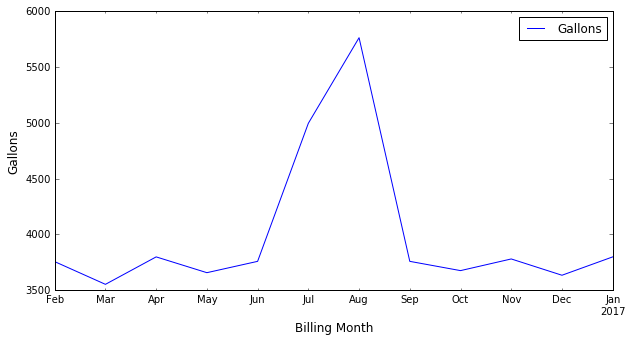

In [3]:
# Import Matplotlib and set it to run inline with the notebook
%matplotlib inline
import matplotlib as plt

# Create chart and adjust the size and labels
chart = df.plot(figsize=(10,5))
chart.set_ylabel('Gallons', fontsize=12)
chart.set_xlabel('Billing Month', fontsize=12)

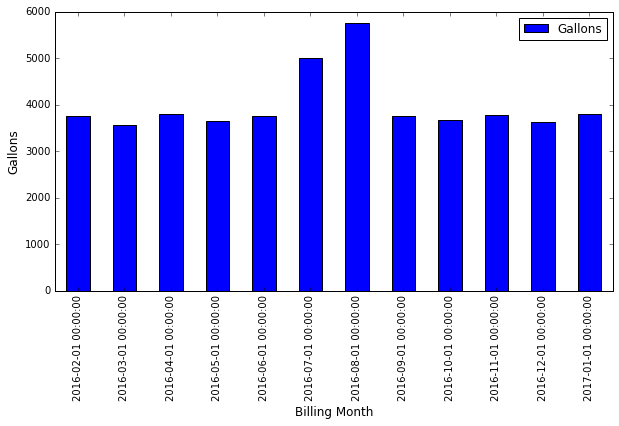

In [4]:
# Change to a bar chart using kind='bar'
chart = df.plot(figsize=(10,5), kind='bar')
chart.set_ylabel('Gallons', fontsize=12)
chart.set_xlabel('Billing Month', fontsize=12)